<a href="https://colab.research.google.com/github/PX2145-2025/week-4-b-Emma-Goldsmith/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Exercise 1 - Use the above ideas to repeat a linear fit using the curve_fit routine (not a quadratic as in the example in the introduction). Confirm, by using your linfit function, that you get the same result as before.

slope:  10.000000000000002 +/- 1.5211130768648627e-30
intercept:  -1.0 +/- 5.923884344012879e-31



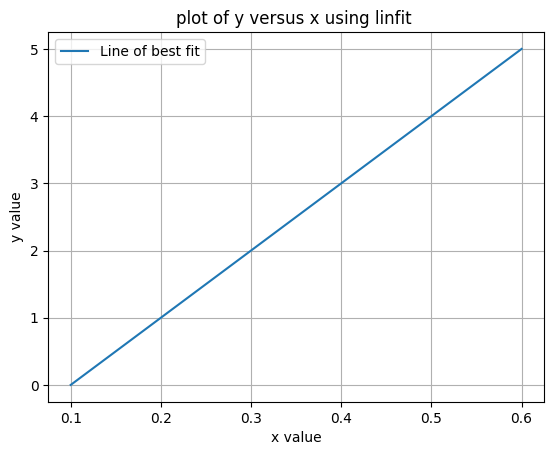

In [ ]:
from numpy import *
from matplotlib.pyplot import *

#define the function linfit(x,y) to perform a least squares fit
def linfit(x,y):
  #define x and y as arrays
  x = np.array(x)
  y = np.array(y)
  #Find and plot first order line of best fit
  p_coeff = polyfit(x, y, 1)
  p = poly1d(p_coeff)
  x_line = linspace(min(x), max(x), 100)
  plot(x, p(x), label='Line of best fit')
  # Uncertainties on the slope and intercept
  n= len(x) #number of elements in array
  D= sum(x**2) - 1/n * sum(x)**2
  x_bar = mean(x) #average x value
  residuals = y - p(x)
  p_coeff_full, residuals_full, _, _, _ = polyfit(x, y, 1, full=True) # residulas is the differente between observed and predicted values of data
  dm_squared= 1/(n-2)*sum(residuals_full**2) / D
  dc_squared = 1/(n-2)*(D/n + x_bar**2)*sum(residuals_full**2) / D
  # Define terms
  dm = sqrt(dm_squared)
  dc = sqrt(dc_squared)
  return p_coeff, dm, dc

# Calling the fitting function:
p_coeff, dm, dc = linfit(x_data, y_data)
print ('slope: ', p_coeff[0], '+/-', dm)
print ('intercept: ', p_coeff[1], '+/-', dc)
print ()
xlabel('x value')
ylabel('y value')
plt.title('plot of y versus x using linfit ')
plt.legend()
plt.grid()


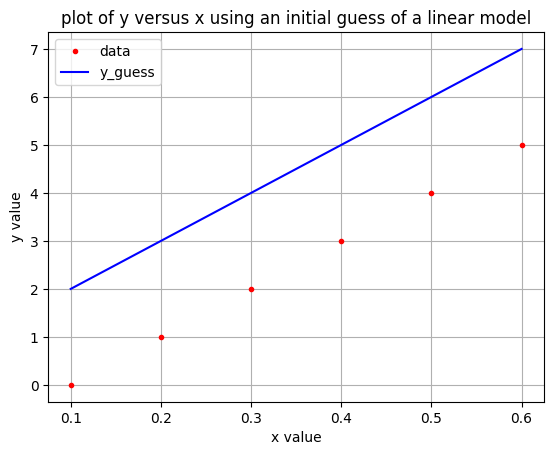

In [ ]:
#sample data
x_data = np.array([0.1,0.2,0.3,0.4,0.5,0.6])
y_data = np.array([0,1,2,3,4,5])

#define linear model
def linear_model(x,m,b):
  return m*x + b

x_plot = np.linspace(min(x_data), max(x_data), num=100)
p_guess = np.array([10.0,1.0])
y_guess = linear_model(x_plot, p_guess[0], p_guess[1])
plt.plot(x_data, y_data, 'r.', label='data')
plt.plot(x_plot, y_guess, 'b-', label='y_guess')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('plot of y versus x using an initial guess of a linear model')
plt.legend()
plt.grid()

a:  10.0 +/- 0.0
b:  -1.0 +/- 0.0



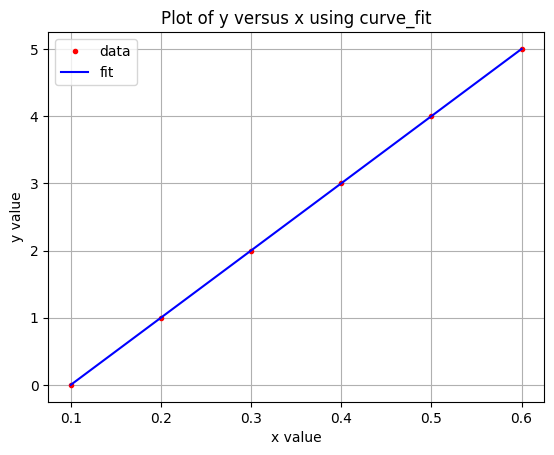

In [ ]:
popt, pcov = curve_fit(linear_model, x_data, y_data, p_guess)
print ('a: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]))
print ('b: ', popt[1], '+/-', np.sqrt(pcov.diagonal()[1]))
print()

x_plot = np.linspace(min(x_data),max(x_data),num=100)

# find fitted curve by creating an array yfit of data points ...
yfit = linear_model(x_plot, popt[0], popt[1])

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, yfit, 'b-',label='fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using curve_fit')
plt.legend()
plt.grid ()

Exercise 2

In [ ]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week4/XRD_data_Mo_anode.csv

In [ ]:
XRD = np.loadtxt('XRD_data_Mo_anode.csv', delimiter=',')

x_full = XRD[:, 0]
cr_full = XRD[:,1]

1 - Read in the raw data points and plot a graph. Estimate by eye and make a note of the rough positions, widths and intensitys of the first two main peaks in first order (highest peaks), around angles of 6 and 7 degrees. Create a single data array that include the angle and count values from around those two peaks.

/tmp/ipython-input-477063990.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


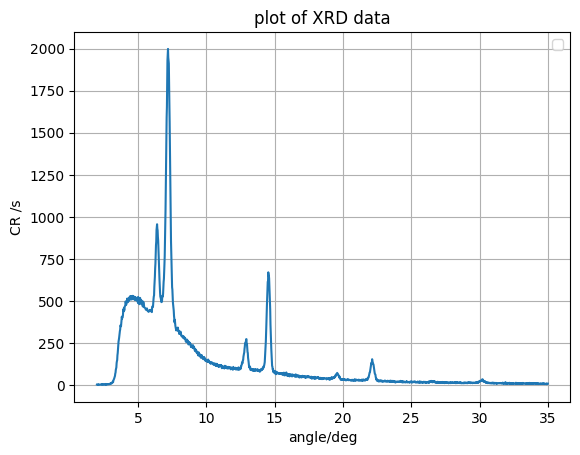

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_full, cr_full)
plt.xlabel('angle/deg')
plt.ylabel('CR /s')
plt.title('plot of XRD data')
plt.legend()
plt.grid()

position - The first main peak is at roughly 6 degrees, and the second main peak is at roughly 7.

intensity - The intesity of the first main peak is about 950 counts per second, and the second is at 2000 counts per second.

width - The width of each peak is roughly 1 degree.




In [ ]:
angles_full_data = x_full
CR_full_data = cr_full


x = angles_full_data[(angles_full_data>=5) & (angles_full_data<=10)]
cr = CR_full_data[(angles_full_data>=5) & (angles_full_data<=10)]

2 - The peaks can be approximated as Gaussian in shape.
Define (in a similar way you did for the linear fitting) a Gaussian function, which you will use for fitting the data:

Gau(x, intensity, mu, sigma)

Note that this Gaussian is normalised to have an area under the curve of intensity (I).

In [ ]:
def Gau(x, intensity, mu, sigma):
  return intensity*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

3 - Now use curve_fit() to try fitting a Gaussian to the highest peak in the data you selected containing those first two peaks near 6 and 7. and plot the result. Remember to first plot your guess

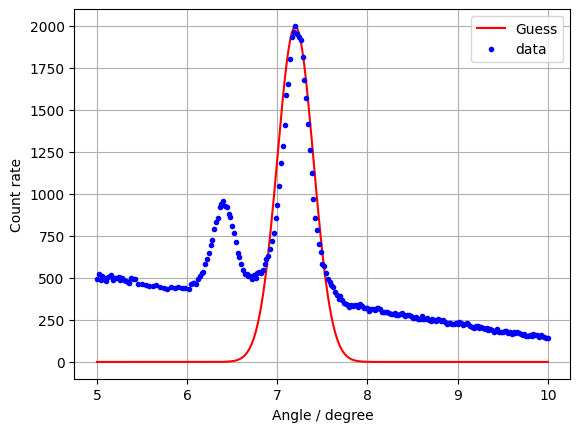

In [ ]:
#fit around peak
p_init = np.array([1000, 7.2, 0.2])
plt.plot(x, Gau(x, p_init[0], p_init[1], p_init[2]), 'r', label='Guess');
plt.plot(x, cr, 'b.',label='data')
plt.xlabel('Angle / degree')
plt.ylabel('Count rate')
plt.grid()
plt.legend()

4. Repeat, but allowing for a constant background offset to improve the fit. Hint:
Do this by defining a fitting function comprising a constant term plus a Gaussian, say
Gau_background(x, intensity, mu, sigma, bckg). (You can call the Gau() function from
within Gau_background(). You now have four fitting parameters instead of three.)

Best guess parameters  [5.86965206e+02 7.20531874e+00 1.48026382e-01 3.71859066e+02]
Estimate of errors  [2.38227479e+01 6.33249502e-03 6.54031426e-03 1.23594830e+01]


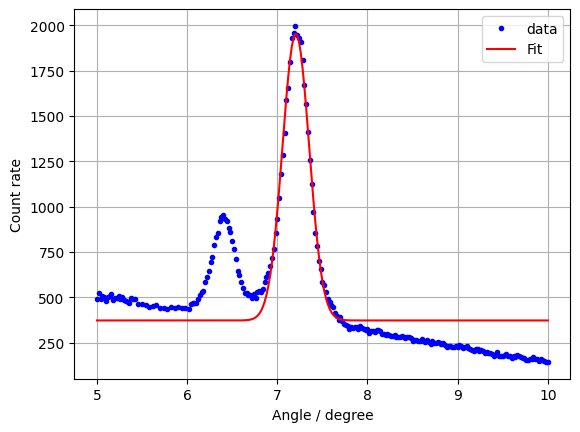

In [ ]:
#define a gaussian function with an offset
def Gau2(x, intensity, mu, sigma, c):
  return Gau(x, intensity, mu, sigma) +c

#fit around peak
p0 = np.array([*p_init, 0]) #* collects any numbers of excess positional arguments
popt, pcov = curve_fit(Gau2, x, cr, p0)

print('Best guess parameters ', popt)
print('Estimate of errors ', np.sqrt(pcov.diagonal()))
plt.plot(x, cr, 'b.',label='data')
plt.plot(x, Gau2(x, *popt), 'r', label='Fit')
plt.xlabel('Angle / degree')
plt.ylabel('Count rate')
plt.grid()
plt.legend()

5. Repeat, but allowing for a linear background to improve the fit. (This requires a function
with an extra fitting parameter.)

In [ ]:
#define a gausian function with offset and background slope
def Gau3(x, intensity, mu, sigma, c, m):
  return Gau2(x, intensity, mu, sigma, c) +m

Best guess parameters  [ 5.86960327e+02  7.20531874e+00  1.48024678e-01  2.06915437e+07
 -2.06911719e+07]
Estimate of errors  [2.38757922e+01 6.34724165e-03 6.55842895e-03 2.11447864e+16
 2.11447863e+16]


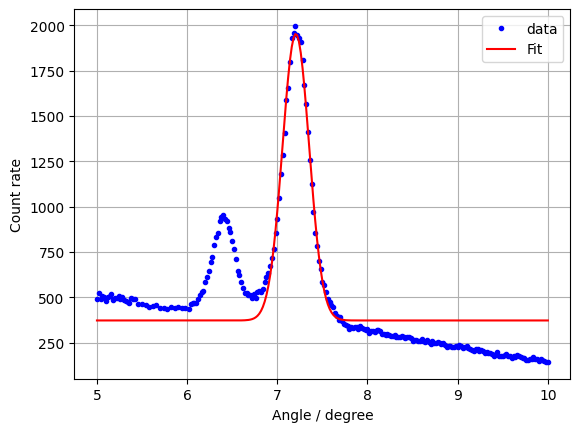

In [ ]:
#fit aorund peak
p00 = np.array([*p0, 0])

popt, pcov = curve_fit(Gau3, x, cr, p00) # fits data in limited range

print('Best guess parameters ', popt)
print('Estimate of errors ', np.sqrt(pcov.diagonal()))
plt.plot(x, cr, 'b.',label='data')
plt.plot(x, Gau3(x, *popt), 'r', label='Fit')
plt.xlabel('Angle / degree')
plt.ylabel('Count rate')
plt.grid()
plt.legend()

6. Repeat, but allowing not only for a linear background to improve the fit, but also trying
to fit the other peak

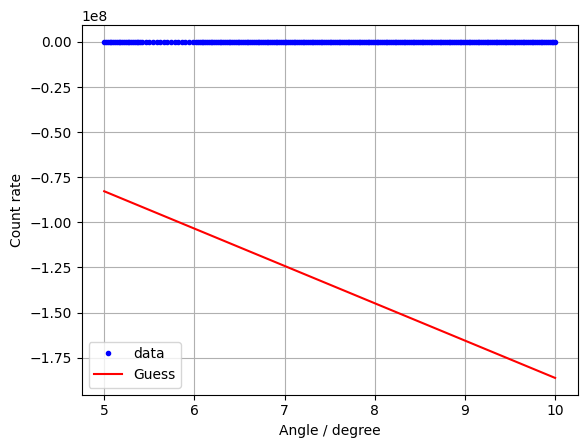

In [ ]:
# define a double gaussian function with offfset and background slopes

def Gau4(x, intensity1, mu1, sigma1, intensity2, mu2, sigma2, c, m):
  return Gau(x, intensity1, mu1, sigma1) + Gau(x, intensity2, mu2, sigma2) + c + m*x

# Fit around 2 peaks ...
# guess of initial parameters, with (intensity1, mu1, sigma1, c, m) based on␣
#previous fit
p0 = np.array([ popt[0], popt[1], popt[2], 100, 6.4, 0.1, popt[3], popt[4]])
# [1] for initial guesses, you can use the previous fitting steps.
plt.plot(x, cr, 'b.',label='data')
plt.plot(x, Gau4(x, *p0), 'r', label='Guess')
plt.xlabel('Angle / degree')
plt.ylabel('Count rate')
plt.grid()
plt.legend()

Best guess parameters  [ 5.92300111e+02  7.20827964e+00  1.48705039e-01  1.71727085e+02
  6.41267279e+00  1.36886259e-01  8.91760714e+02 -7.32127344e+01]
Estimate of errors  [4.13900421e+00 1.05711529e-03 1.10365443e-03 4.17943137e+00
 3.22029657e-03 3.42891258e-03 1.18194452e+01 1.45497994e+00]


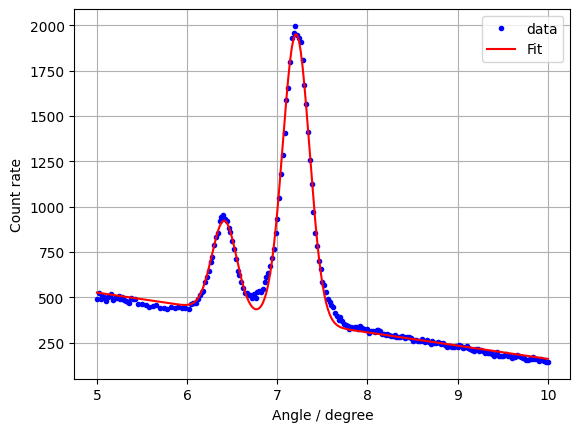

In [ ]:
popt, pcov = curve_fit(Gau4, x, cr, p0=p0)
# [1] for call to curve_fit
print('Best guess parameters ', popt)
print('Estimate of errors ', np.sqrt(pcov.diagonal()))
plt.plot(x, cr, 'b.',label='data')
plt.plot(x, Gau4(x, *popt), 'r', label='Fit')
plt.xlabel('Angle / degree')
plt.ylabel('Count rate')
plt.grid()
plt.legend()

In [ ]:
print ('intensity2: {0:.2f} +/- {1:.2f}'.format(popt[3],np.sqrt(pcov.diagonal()[3])))
print ('mu2: {0:.3f} +/- {1:.3f}'.format(popt[4],np.sqrt(pcov.diagonal()[4])))
print ('sigma2: {0:.3f} +/- {1:.3f}'.format(popt[5],np.sqrt(pcov.diagonal()[5])))

intensity2: 171.73 +/- 4.18
mu2: 6.413 +/- 0.003
sigma2: 0.137 +/- 0.003
